<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 13
### Axel Nathanel Nahum


## Introduccion

En este $Jupyter$ nos encontraremos con la resolucion del unico $ejercicio$ de la $TS13$. En este caso nos encontramos con la $sintesis$ de $circuitos$ a partir de la $transferencia$ de un $filtro$ $bessel$ de $orden$ $3$.

<img src="./Enunciado.PNG" align="middle" width="1000" /> 

## Resolucion

### Resolucion ejercicio

In [1]:
from IPython.display import IFrame
IFrame("./Resolucion.pdf", width=900, height=1000)

## Codigo en Python

In [16]:
import sympy as sp
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.remociones import remover_valor_en_infinito, remover_valor, remover_polo_dc, remover_polo_infinito
from pytc2.dibujar import dibujar_elemento_serie, dibujar_elemento_derivacion, Inductor, Capacitor, Resistor, Drawing, dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_cauer_LC

# Resolución simbólica

s = sp.symbols('s ', complex=True)

Z1 = sp.factor(sp.simplify(sp.expand((2*s**3 + sp.simplify(sp.Rational('1041/100'))*s**2 + sp.Rational('2171/100')*s + sp.Rational(15/1))/(sp.Rational('159/100')*s**2 + sp.Rational('829/100')*s + sp.Rational(15/1)))))

print(Z1)

(200*s**3 + 1041*s**2 + 2171*s + 1500)/(159*s**2 + 829*s + 1500)


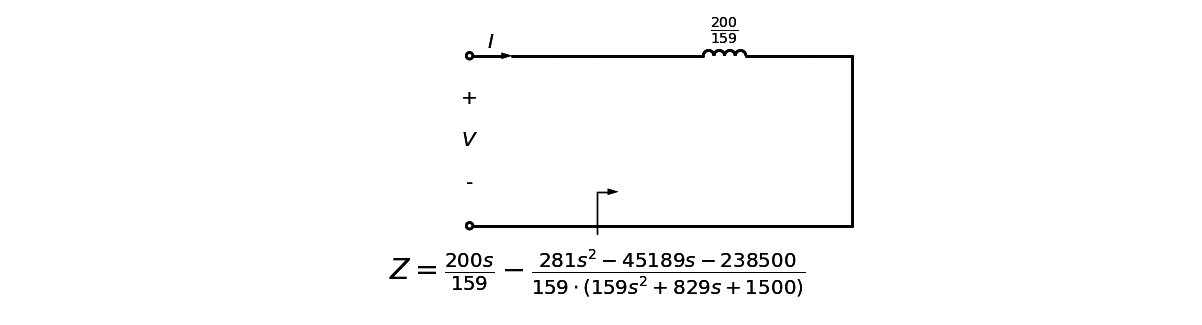

In [17]:
koo, imm_cauer_oo, rem = cauer_LC(Z1, remover_en_inf=True)

dibujar_cauer_LC(koo, z_exc = imm_cauer_oo)

In [18]:
Z2, ZL1 = remover_polo_infinito(Z1)

Z2 = Z1 - ZL1

print(Z2)

Z4, ZC = remover_polo_infinito(Z2)    # Me da 0, no se porque.

print(ZC)

ZC = 0.559*s
ZL2 = 0.189*s
ZRL = 1

T1 = sp.Matrix([[1, ZL1], [0, 1]])
T2 = sp.Matrix([[1, 0], [ZC, 1]])
T3 = sp.Matrix([[1, ZL2], [0, 1]])
T4 = sp.Matrix([[1, 0], [1/ZRL, 1]])

T = T1*T2*T3*T4

zverif = sp.factor(sp.simplify(sp.expand(1/T[1,1])))

display( zverif )   # No estaria seguro como se verifica esto.

-200*s/159 + (200*s**3 + 1041*s**2 + 2171*s + 1500)/(159*s**2 + 829*s + 1500)
0


1.0/(0.105651*s**2 + 1.0)

## Circuito LTSpice

<img src="./Circuito.PNG" align="middle" width="1000" /> 

## Punto 3: Parametros S11 y S21

### Parametro S11:

<img src="./S11.PNG" align="middle" width="1000" /> 

### Parametro S21:

<img src="./S21.PNG" align="middle" width="1000" /> 

Estos dos $graficos$ son distintos como se puede ver en los $graficos$. Esto tambien se puede ver en lo $analitico$ de estas. Los $parametros$ son los siguientes:

$$S11 = \frac{S\left(S^2 + 4.41S + \sqrt{45}\right)}{(S^2 + 6S^2 + 15S + 15)}$$

$$S21 = \frac{15}{(S^2 + 6S^2 + 15S + 15)}$$

Claramente se ve que no son $iguales$, por lo tanto, tampoco las $representaciones$ en funcion de la $frecuencia$.

## Punto 4: Verificacion de frecuencias 

<img src="./S11_med.PNG" align="middle" width="1000" /> 

Es logico que no se vean los $3dB$ en la $frecuencia$ de $corte$. Hay que entender que el $parametro$ $S11$ no es la transferencia. Este parametro es uno de los dos coeficientes de reflexion (especificamente en la entrada) y mas que nada se relaciona con la potencia. El filtro $Bessel$ de $tercer$ $orden$ deforma el modulo de este ya que se diseña sobre el $retardo$ de $grupo$ y no sobre el $modulo$. En $\Omega = 1$ (en este caso una $frecuencia$ de aproximadamente igual a $158mHz$, osea $\frac{1}{2 \pi}$) vamos a tener otro ripple y no el que queriamos. Obviamente se puede normalizar para un $\omega = 1$. Esto es importante ya que la transferencia del Bessel, no esta normalizada para un $\omega_0 = 1$. La transferencia igual a S21, es decir:

$$T(S) = \frac{V_2}{V_1} = \frac{15}{(S^2 + 6S^2 + 15S + 15)}$$

<img src="./S11_med2.PNG" align="middle" width="1000" /> 

Se puede ver como en $infinito$ gana $0db$, es decir, no atenua. Por otro lado, en $0$, se hace practicamente $0$. Esto tambien verifica lo visto en la parte $analitica$.

## 5) Caso desnormalizado

<img src="./S11_Med_1MEG.PNG" align="middle" width="1000" /> 

Se puede ver como verifica con el $parametro$ $S11$ anterior.